In [1]:
%load_ext autoreload
%autoreload 2

import helper
% matplotlib inline

In [2]:
'''
IDEAs to try:
- optimize search for ensemble
- grid search hyper-parameters
- neural net
'''

'\n- create_matrix function: with sort, faster?\n- optimize search for ensemble\n- grid search hyper-parameters\n- Neural net\n'

In [3]:
# file_path_prefix = 'C:/Users/mhntx/Google Drive/To Sync/Machine Learning/Collaborative Filtering/' # nuk
file_path_prefix = 'C:/Users/My/Google Drive/To Sync/Machine Learning/Collaborative Filtering/' # laptop

In [4]:
data_file_path = file_path_prefix + 'ml-100k/u.data'
data = helper.read_in_data(data_file_path) # data is a tuple of numpy arrays: user_id, item_id, rating, timestamp

In [7]:
# put data into matrix form: rows of movies, columns of users, values of ratings. omit timestamp info
# data_matrix = helper.create_matrix(data) # shape: (n_items, n_users) = (1682, 943)

In [6]:
# pickle data_matrix as it took some time
saved_data_path = file_path_prefix + 'checkpoints/data_matrix'

In [7]:
# helper.save_data(data_matrix, saved_data_path)

In [8]:
# load data_matrix
data_matrix = helper.load_data(saved_data_path)

In [9]:
# parameters
n_items, n_users = data_matrix.shape

In [10]:
# split data into train, val, & test sets
# test set: default is 20% items for each user. only test available ratings, ie., no non-available ratings were used.
for train_val_data, test_data in helper.create_train_val_test_data(data_matrix, test_size=0.2):
    train_val_data, test_data = train_val_data, test_data

In [11]:
# train model, return parameters (features & thetas), loss and error for each cv

# hyperparameters
n_features = 10
n_folds = 5 # n_folds for cross validation
alpha = 0.001 # learning rate
reg_lambda = 10 # regularization lambda

output_dict = helper.train(train_val_data, n_items, n_users, n_features, n_folds, alpha, reg_lambda)

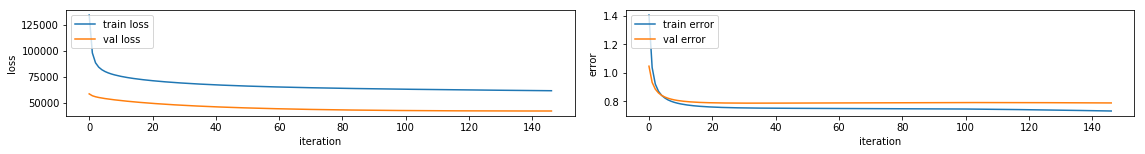

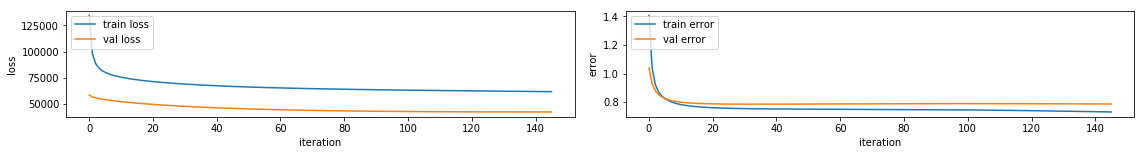

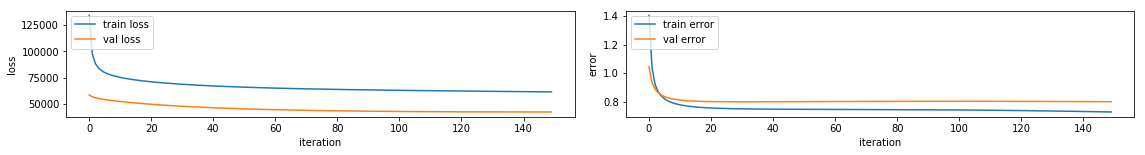

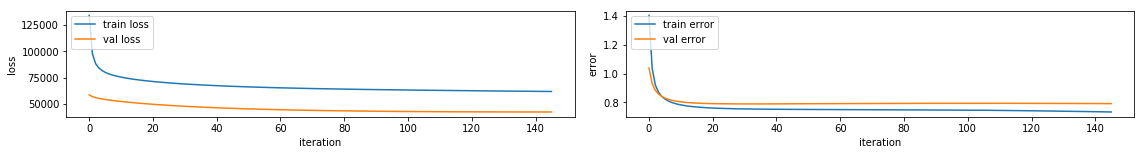

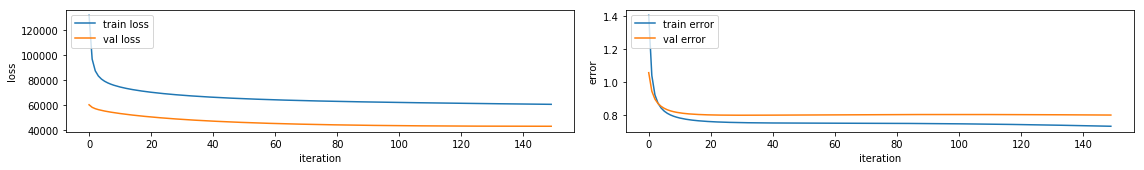

In [17]:
helper.visualize_training(output_dict)

In [23]:
# predict on test set
ensemble_output = helper.predict_ensemble(output_dict['features'], output_dict['thetas'], test_data)

In [24]:
ensemble_output

{'error_ensemble': 0.78872133030939295,
 'errors': [0.78992561245602622,
  0.79047970719465999,
  0.79112134923865707,
  0.79315908167288007,
  0.79496652584590777],
 'y_pred_ensemble': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'y_preds': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
  array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., .